<a target="_blank" href="https://colab.research.google.com/github/mHemaAP/S11/blob/main/S11.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
!git clone https://github.com/mHemaAP/model_framework.git
%pushd model_framework
!git pull

Cloning into 'model_framework'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 0), reused 31 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 22.75 KiB | 4.55 MiB/s, done.
/content/model_framework
Already up to date.


In [5]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
%ls
%popd

datasets/  __init__.py  main.py  models/  README.md  requirements.txt  utils/
/content
popd -> /content


In [7]:
import sys
import os
sys.path.append(os.getcwd())
# import pathlib
# target_path = pathlib.Path(os.path.abspath(__file__)).parents[3]
# sys.path.append(target_path)

In [11]:
import model_framework.main
from model_framework.main import *

100%|██████████| 170498071/170498071 [00:01<00:00, 106519190.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/content/model_framework/datasets/abstract_dataset.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  denorm_img = torch.tensor(img, requires_grad=False)


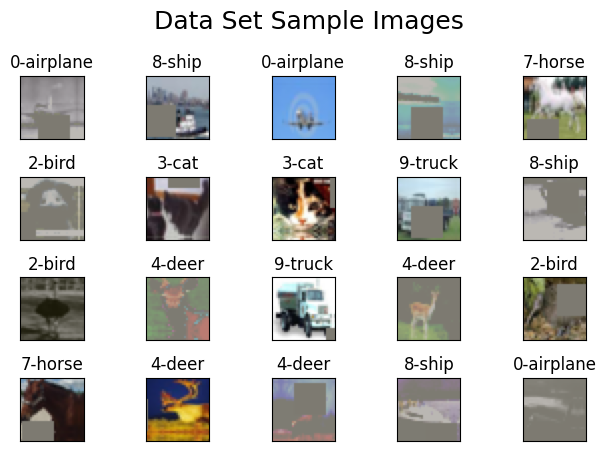

In [12]:
cifar10_data.show_dataset_images()

In [13]:
model_summary(model)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Param %
ResNet                                   [64, 3, 32, 32]           [64, 10]                  --                        --                             --
├─Conv2d: 1-1                            [64, 3, 32, 32]           [64, 64, 32, 32]          1,728                     [3, 3]                      0.02%
├─BatchNorm2d: 1-2                       [64, 64, 32, 32]          [64, 64, 32, 32]          128                       --                          0.00%
├─Sequential: 1-3                        [64, 64, 32, 32]          [64, 64, 32, 32]          --                        --                             --
│    └─BasicBlock: 2-1                   [64, 64, 32, 32]          [64, 64, 32, 32]          --                        --                             --
│    │    └─Conv2d: 3-1                  [64, 64, 32, 32]          [64, 64, 32, 32

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.57E-02


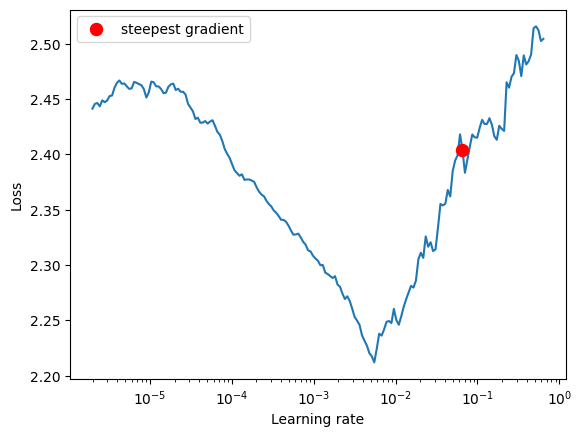

In [14]:
train_model1 = create_model_train_instance(model,
                                          cifar10_data,
                                          epochs=20,
                                          loss_criterion='CE',
                                          scheduler='one_cycle',
                                          optimizer = 'SGD')

In [15]:
train_model1.run_training_model()

| Epoch | LR       | Time    | TrainLoss | TrainAcc | TestLoss | TestAcc |
|     1 | 0.013659 | 00m 44s | 1.739569  |  33.52%  | 0.024268 |  50.07% |
|     2 | 0.026662 | 00m 45s | 1.049561  |  50.22%  | 0.016270 |  64.42% |
|     3 | 0.039664 | 00m 45s | 0.967153  |  58.84%  | 0.013790 |  69.18% |
|     4 | 0.052667 | 00m 45s | 0.882233  |  64.44%  | 0.010724 |  76.58% |
|     5 | 0.065647 | 00m 45s | 0.693995  |  67.72%  | 0.010569 |  76.92% |
|     6 | 0.061271 | 00m 46s | 0.807280  |  70.07%  | 0.008960 |  79.91% |
|     7 | 0.056894 | 00m 45s | 1.286489  |  72.31%  | 0.008877 |  80.28% |
|     8 | 0.052518 | 00m 46s | 1.228477  |  73.92%  | 0.007976 |  82.66% |
|     9 | 0.048141 | 00m 45s | 0.874616  |  75.38%  | 0.007370 |  83.94% |
|    10 | 0.043765 | 00m 46s | 1.167579  |  76.32%  | 0.008421 |  82.74% |
|    11 | 0.039389 | 00m 45s | 0.350345  |  77.57%  | 0.006524 |  86.12% |
|    12 | 0.035012 | 00m 46s | 0.639513  |  78.39%  | 0.006525 |  86.13% |
|    13 | 0.030636 | 00m 

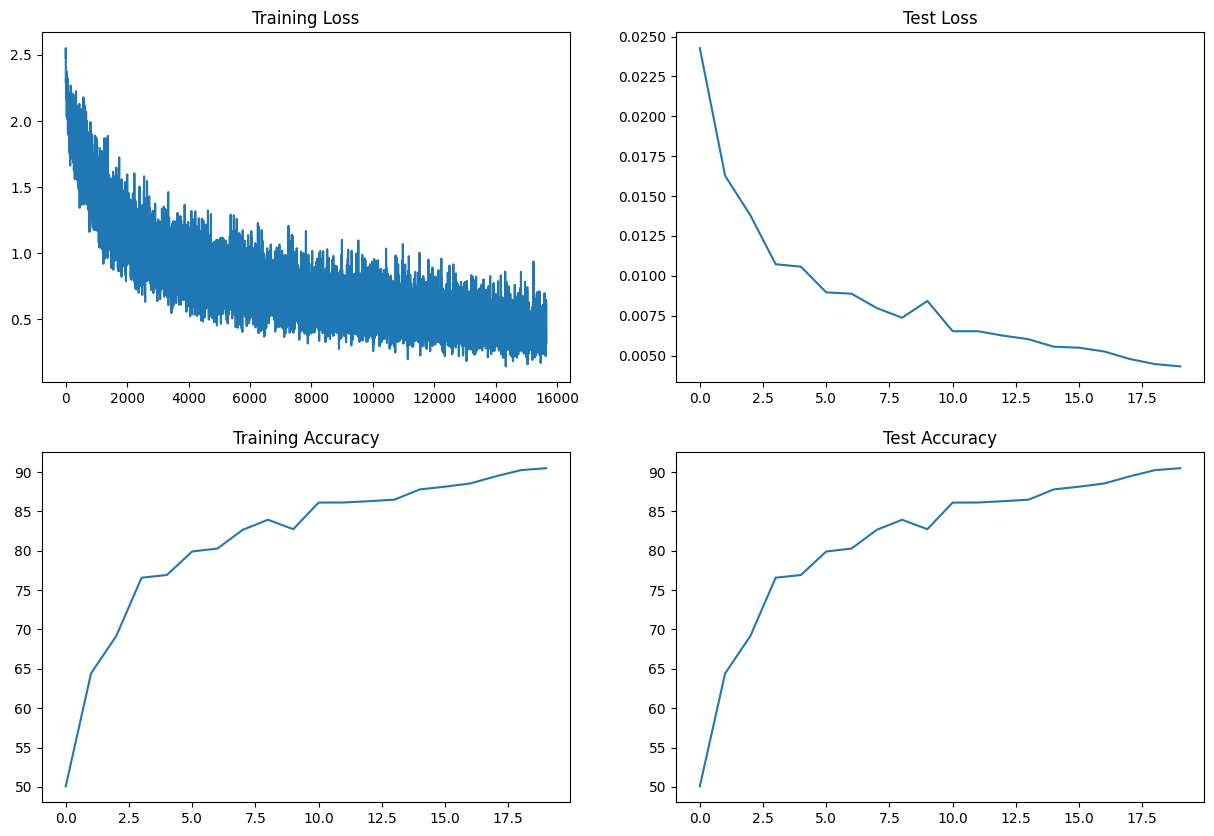

In [16]:
train_model1.display_model_stats()

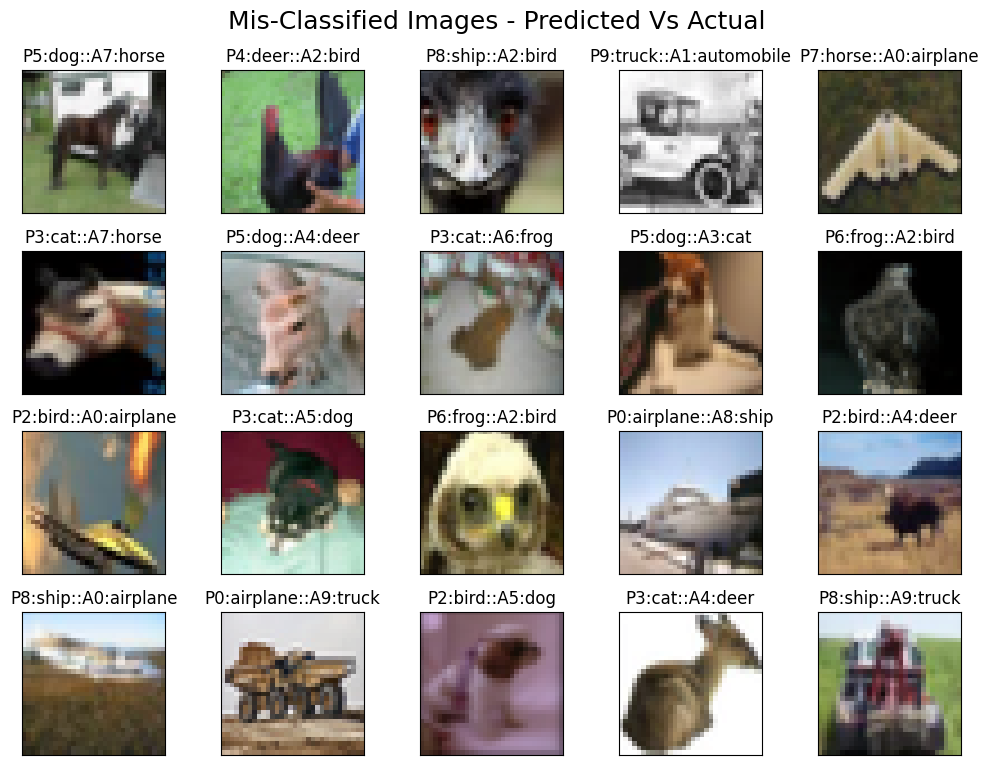

In [17]:
train_model1.show_cifar10_incorrect_predictions()

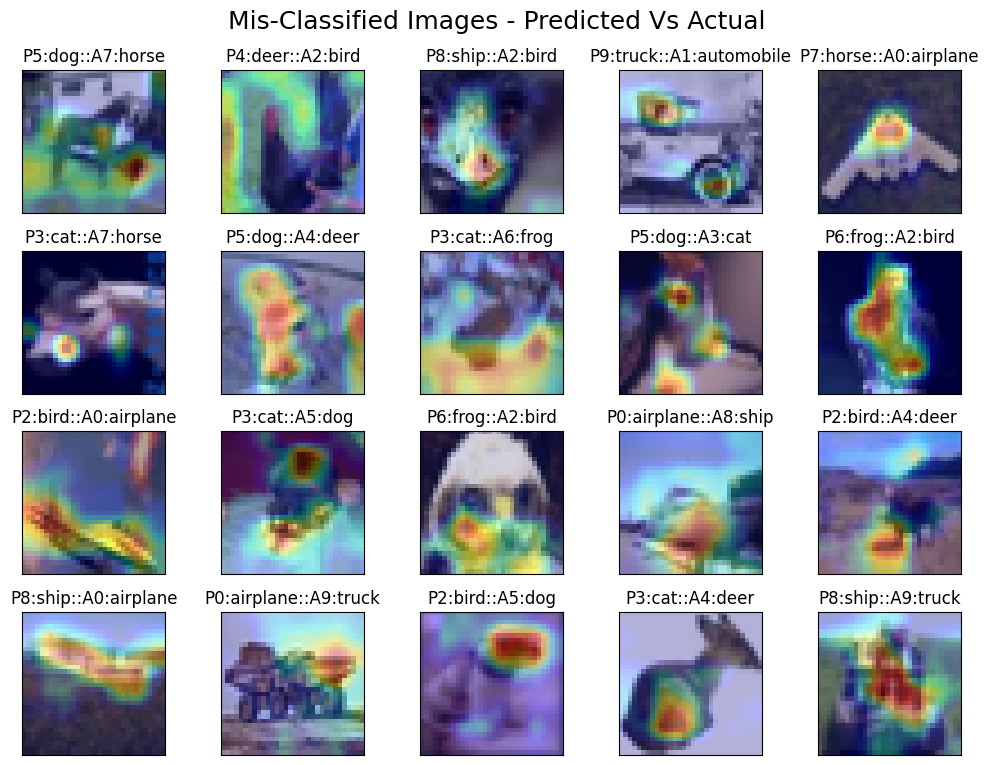

In [18]:
train_model1.show_cifar10_incorrect_predictions(grad_cam=True)